In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np

import matplotlib as mpl
sys.path.insert(1, "/home/dima/Projects/NNCompression")
from pathlib import Path
import torch.nn as nn
import seaborn as sns

In [2]:
import visualization.runner_output_utils as o
import visualization.visualize as v
from importlib import reload

In [3]:
reload(o)
reload(v)

<module 'visualization.visualize' from '/home/dima/Projects/NNCompression/visualization/visualize.py'>

In [4]:
runs = o.enumerate_run_folder("/run/media/dima/Scratch/run_out/run_out/outputs/resnet18_perturb_experiment/")
runs = o.filter_incomplete_runs(runs)
runs = o.load_runs(runs)
len(runs)

60

In [5]:
perturb_loss_runs = o.enumerate_run_folder("/run/media/dima/Scratch/perturb_experiment/run_out/resnet18_perturb_loss_01_experiment/")
perturb_loss_runs = o.filter_incomplete_runs(perturb_loss_runs)
perturb_loss_runs = o.load_runs(perturb_loss_runs)
len(perturb_loss_runs)

21

In [6]:
dataset = []

for run in runs:
    run_info = runs[run]
    quant_data = run_info["run_data"].iloc[-1]
    run_config = run_info["config"]
    datapoint = {
        "test_accuracy": quant_data["test_accuracy"].item(),
        "quant_2_test_accuracy": quant_data["quant_2_test_accuracy"].item(),
        "quant_4_test_accuracy": quant_data["quant_4_test_accuracy"].item(),
        "quant_8_test_accuracy": quant_data["quant_8_test_accuracy"].item(),
        "quant_16_test_accuracy": quant_data["quant_16_test_accuracy"].item(),
        "quant_32_test_accuracy": quant_data["quant_32_test_accuracy"].item(),
        "quant_64_test_accuracy": quant_data["quant_64_test_accuracy"].item(),
        "quant_128_test_accuracy": quant_data["quant_128_test_accuracy"].item(),
        "quant_256_test_accuracy": quant_data["quant_256_test_accuracy"].item()
    }
    dataset.append(datapoint)

dataset = pd.DataFrame(dataset)
no_perturb_baseline = dataset.mean()
no_perturb_baseline

test_accuracy              0.625125
quant_2_test_accuracy      0.010428
quant_4_test_accuracy      0.025987
quant_8_test_accuracy      0.137005
quant_16_test_accuracy     0.392572
quant_32_test_accuracy     0.545190
quant_64_test_accuracy     0.581312
quant_128_test_accuracy    0.598728
quant_256_test_accuracy    0.603675
dtype: float64

In [7]:
dataset = []

for run in perturb_loss_runs:
    run_info = perturb_loss_runs[run]
    quant_data = run_info["run_data"].iloc[-1]
    run_config = run_info["config"]
    datapoint = {
        "perturb_variance": run_config["perturb_variance"],
        "perturb_amount": run_config["perturb_amount"],
        "test_accuracy": quant_data["test_accuracy"].item(),
        "quant_2_test_accuracy": quant_data["quant_2_test_accuracy"].item(),
        "quant_4_test_accuracy": quant_data["quant_4_test_accuracy"].item(),
        "quant_8_test_accuracy": quant_data["quant_8_test_accuracy"].item(),
        "quant_16_test_accuracy": quant_data["quant_16_test_accuracy"].item(),
        "quant_32_test_accuracy": quant_data["quant_32_test_accuracy"].item(),
        "quant_64_test_accuracy": quant_data["quant_64_test_accuracy"].item(),
        "quant_128_test_accuracy": quant_data["quant_128_test_accuracy"].item(),
        "quant_256_test_accuracy": quant_data["quant_256_test_accuracy"].item()
    }
    dataset.append(datapoint)

dataset = pd.DataFrame(dataset)
dataset

,perturb_variance,perturb_amount,test_accuracy,quant_2_test_accuracy,quant_4_test_accuracy,quant_8_test_accuracy,quant_16_test_accuracy,quant_32_test_accuracy,quant_64_test_accuracy,quant_128_test_accuracy,quant_256_test_accuracy
0,0.010,1,0.6401,0.0100,0.0104,0.4188,0.5689,0.5902,0.6103,0.6391,0.6213
1,0.001,3,0.6490,0.0134,0.0167,0.0361,0.4621,0.5953,0.5458,0.5837,0.5857
2,0.010,3,0.6325,0.0100,0.0118,0.0935,0.4802,0.5816,0.5889,0.5761,0.6051
3,0.010,5,0.6519,0.0100,0.0140,0.1104,0.3503,0.3882,0.6386,0.6362,0.6336
4,0.100,4,0.6622,0.0100,0.0102,0.0727,0.2250,0.4200,0.5990,0.5525,0.4392
5,0.001,2,0.6298,0.0100,0.0112,0.3555,0.4428,0.5749,0.6016,0.6205,0.6238
6,0.001,1,0.6336,0.0100,0.0422,0.3959,0.3607,0.5825,0.6291,0.6049,0.6255
7,0.100,2,0.6336,0.0100,0.0121,0.1215,0.2196,0.4287,0.4163,0.4219,0.4164
8,0.001,10,0.6259,0.0100,0.0186,0.1707,0.3099,0.5464,0.5843,0.5905,0.5707
9,0.001,5,0.6376,0.0115,0.0100,0.2919,0.4754,0.6007,0.5996,0.6173,0.6406


In [8]:
dataset["test_accuracy_diff"] = dataset["test_accuracy"] - no_perturb_baseline["test_accuracy"]
dataset["quant_2_test_accuracy_diff"] = dataset["quant_2_test_accuracy"] - no_perturb_baseline["quant_2_test_accuracy"]
dataset["quant_4_test_accuracy_diff"] = dataset["quant_4_test_accuracy"] - no_perturb_baseline["quant_4_test_accuracy"]
dataset["quant_8_test_accuracy_diff"] = dataset["quant_8_test_accuracy"] - no_perturb_baseline["quant_8_test_accuracy"]
dataset["quant_16_test_accuracy_diff"] = dataset["quant_16_test_accuracy"] - no_perturb_baseline["quant_16_test_accuracy"]
dataset["quant_32_test_accuracy_diff"] = dataset["quant_32_test_accuracy"] - no_perturb_baseline["quant_32_test_accuracy"]
dataset["quant_64_test_accuracy_diff"] = dataset["quant_64_test_accuracy"] - no_perturb_baseline["quant_64_test_accuracy"]
dataset["quant_128_test_accuracy_diff"] = dataset["quant_128_test_accuracy"] - no_perturb_baseline["quant_128_test_accuracy"]
dataset["quant_256_test_accuracy_diff"] = dataset["quant_256_test_accuracy"] - no_perturb_baseline["quant_256_test_accuracy"]

In [ ]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference at the end")

Text(0.5, 1.0, 'Accuracy difference at the end')

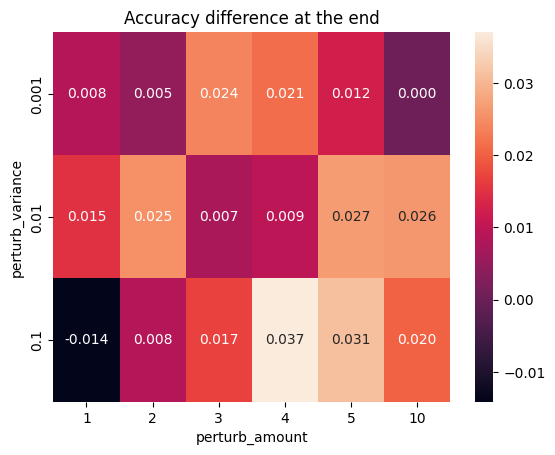

In [18]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference at the end")

Text(0.5, 1.0, 'Accuracy difference for 2 quantization levels')

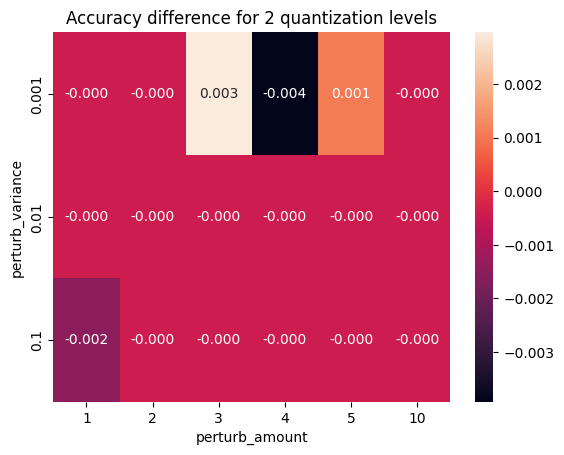

In [19]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_2_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 2 quantization levels")

Text(0.5, 1.0, 'Accuracy difference for 4 quantization levels')

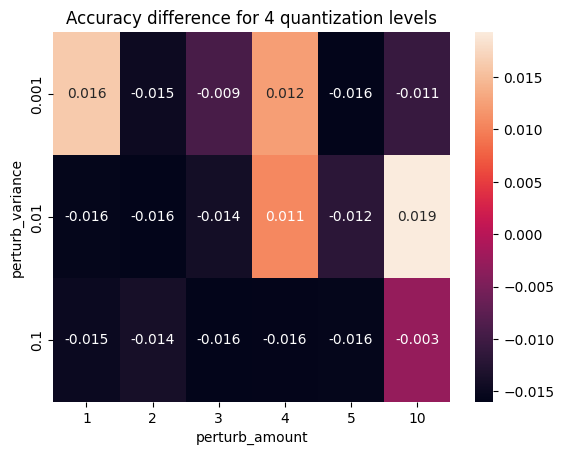

In [20]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_4_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 4 quantization levels")

Text(0.5, 1.0, 'Accuracy difference for 8 quantization levels')

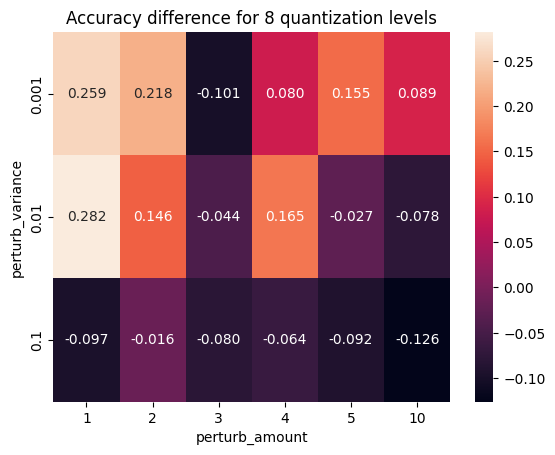

In [21]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_8_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 8 quantization levels")

Text(0.5, 1.0, 'Accuracy difference for 16 quantization levels')

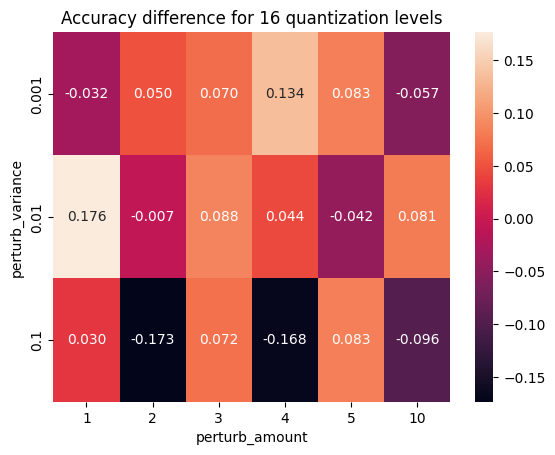

In [22]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_16_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 16 quantization levels")

Text(0.5, 1.0, 'Accuracy difference for 32 quantization levels')

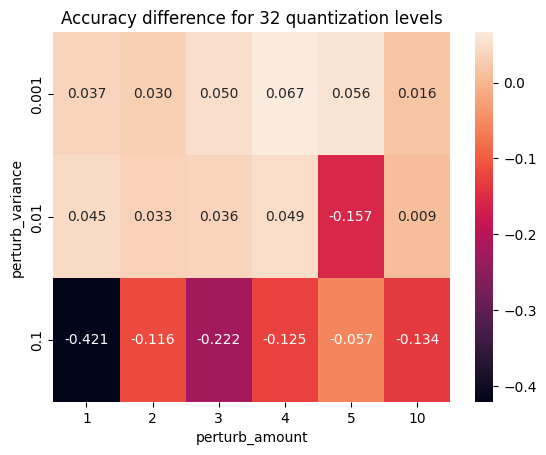

In [23]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_32_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 32 quantization levels")

Text(0.5, 1.0, 'Accuracy difference for 64 quantization levels')

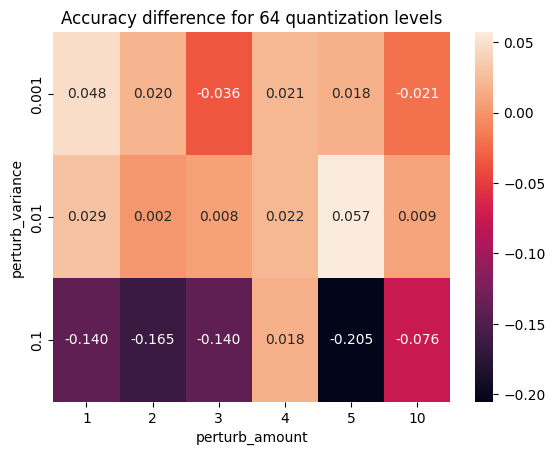

In [24]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_64_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 64 quantization levels")

Text(0.5, 1.0, 'Accuracy difference for 128 quantization levels')

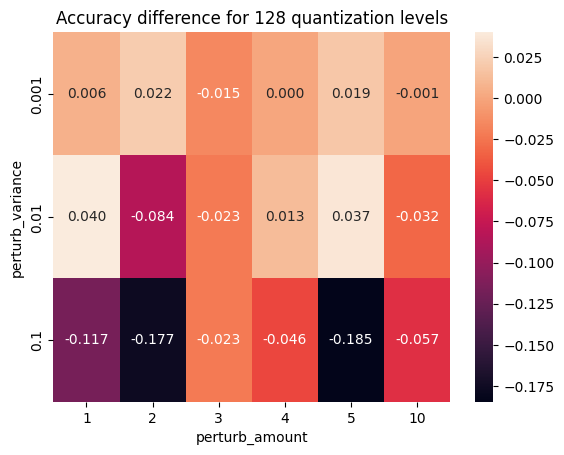

In [25]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_128_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 128 quantization levels")

Text(0.5, 1.0, 'Accuracy difference for 256 quantization levels')

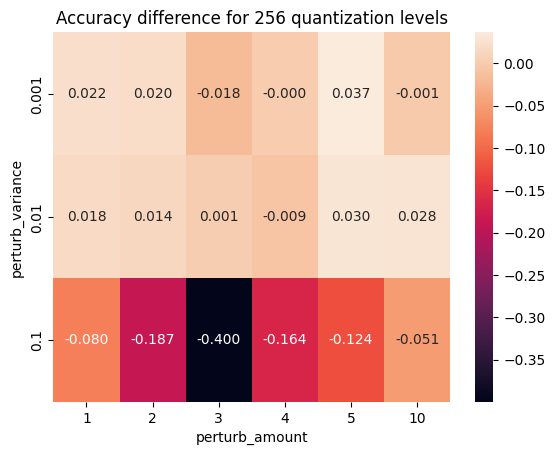

In [26]:
dd = dataset.pivot_table(index="perturb_variance", columns="perturb_amount", values="quant_256_test_accuracy_diff")
sns.heatmap(dd, annot=True, fmt=".3f")
plt.title("Accuracy difference for 256 quantization levels")